In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd

          X         Y  Labels
0  0.428577  4.973997       0
1  1.619909  0.067645       1
2  1.432893  4.376792       0
3 -1.578462  3.034458       2
4 -1.658629  2.267460       2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       300 non-null    float64
 1   Y       300 non-null    float64
 2   Labels  300 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 6.0 KB
None
[0 1 2]


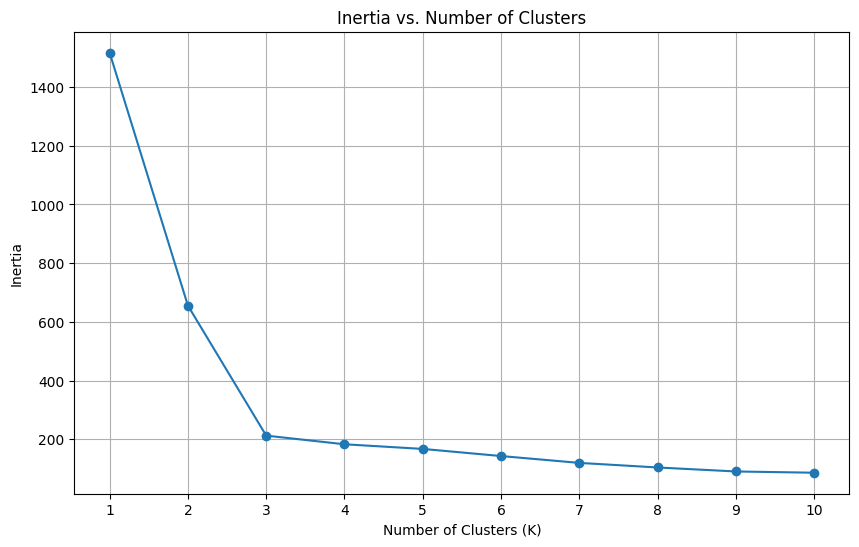

In [2]:
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
# Create a DataFrame
df = pd.DataFrame({'X': X[:, 0], 'Y': X[:, 1], 'Labels': y})
print(df.head())
print(df.info())
print(df.loc[:, 'Labels'].unique())
# Determine the range of K values
K_range = range(1, 11)
inertia_values = []
# Calculate inertia for each K
for K in K_range:
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)
# Plot the inertia
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia_values, marker='o')
plt.title('Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid()
plt.show()

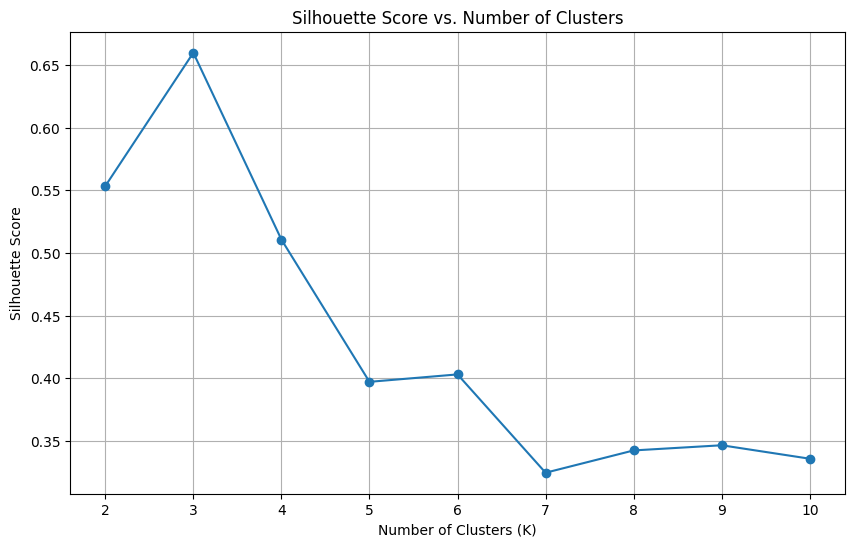

In [3]:
from sklearn.metrics import silhouette_score
# Determine the range of K values
K_range = range(2, 11)
silhouette_values = []
# Calculate silhouette score for each K
for K in K_range:
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(X)
    silhouette_values.append(silhouette_score(X, kmeans.labels_))
# Plot the silhouette score
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_values, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(K_range)
plt.grid()
plt.show()

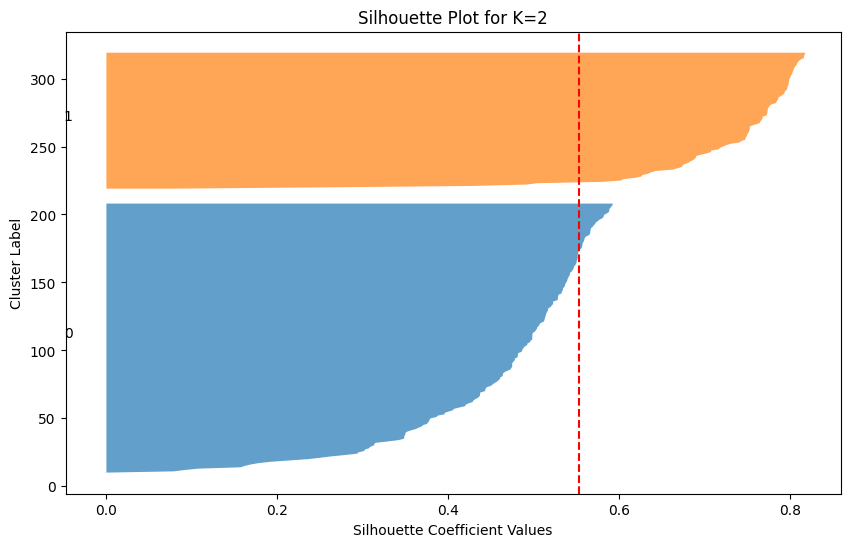

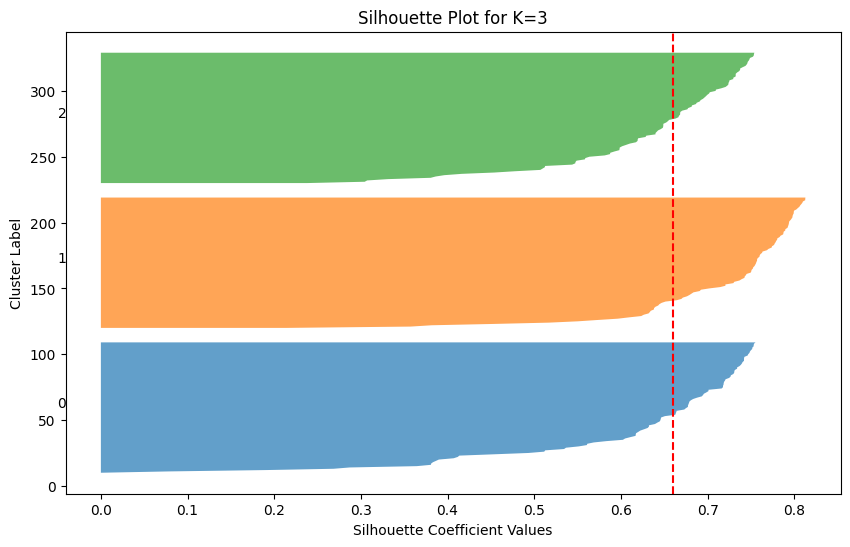

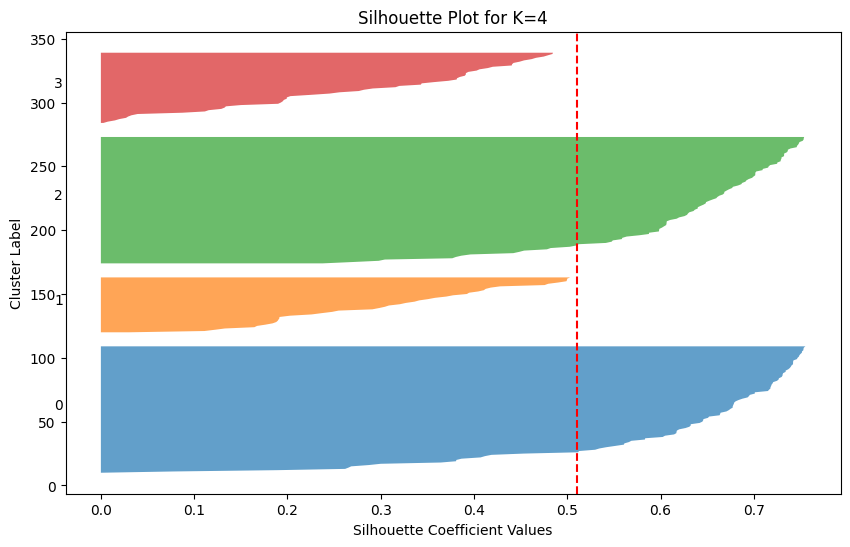

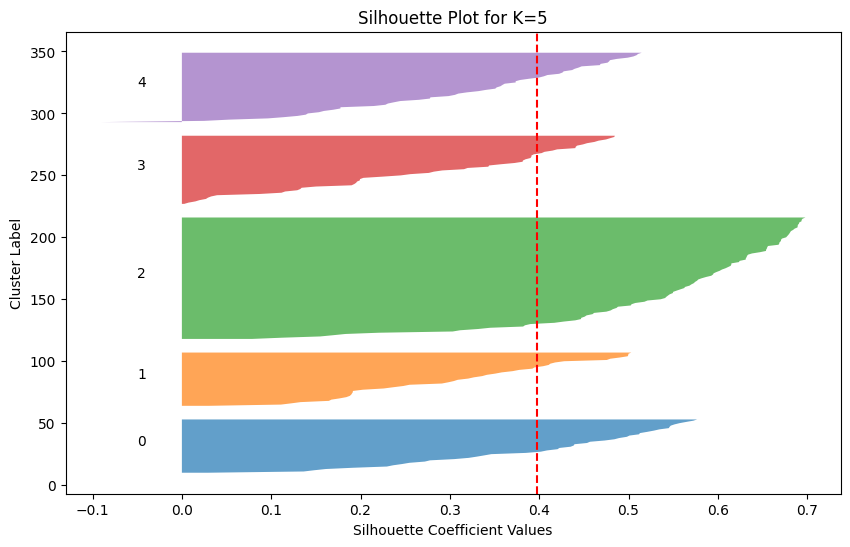

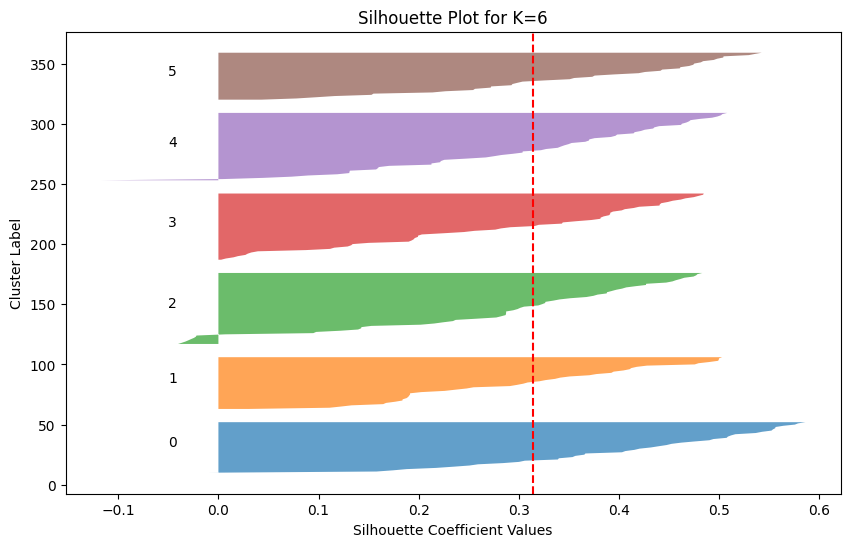

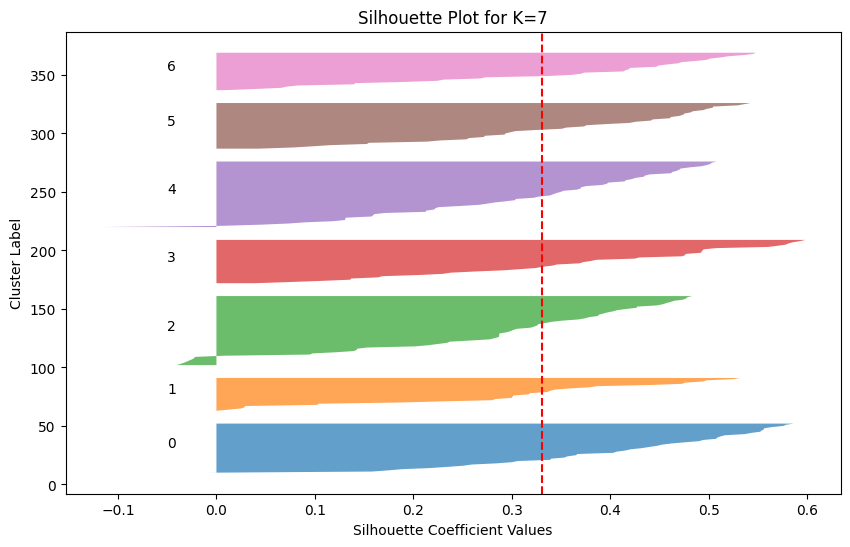

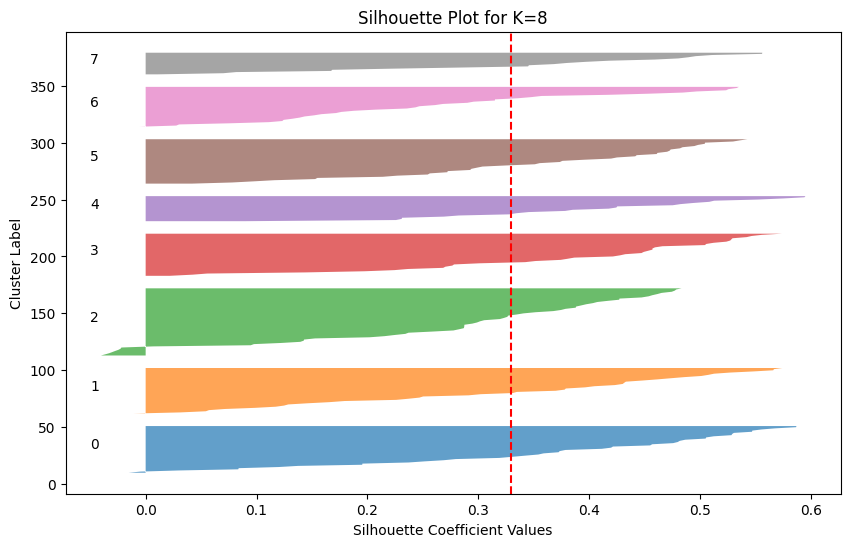

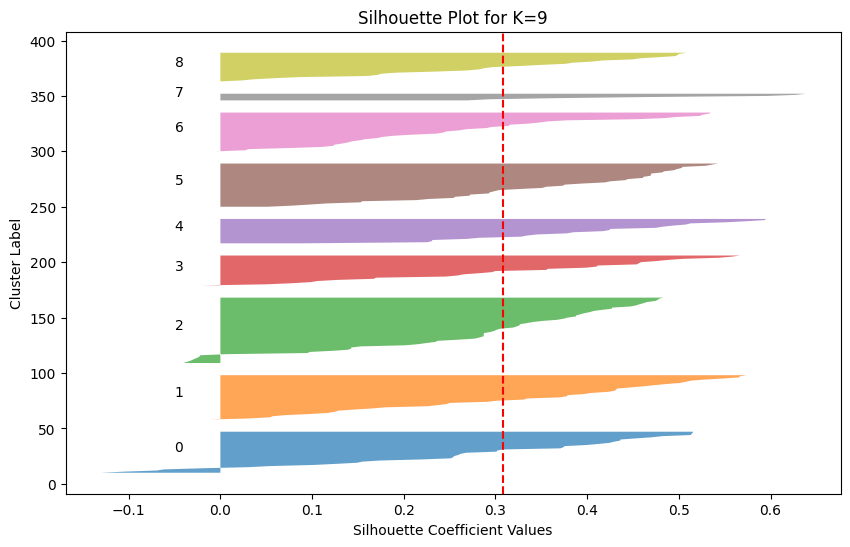

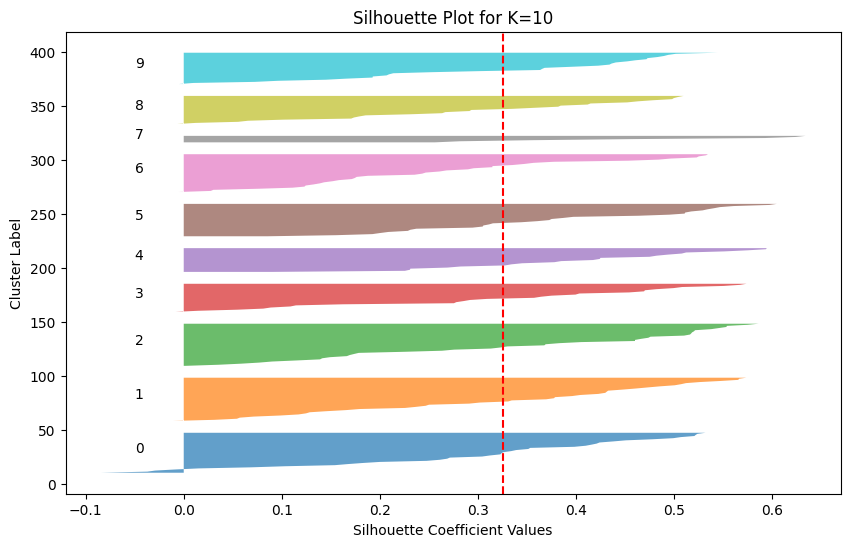

In [7]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import numpy as np

X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
# Specify the number of clusters

# Fit KMeans


for c in range(2, 11):
    kmeans = KMeans(n_clusters=c, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    # Calculate silhouette values for each sample
    silhouette_vals = silhouette_samples(X, cluster_labels)
    # Create a silhouette plot
    y_lower = 10
    plt.figure(figsize=(10, 6))
    for i in range(c):
        # Aggregate the silhouette scores for samples belonging to cluster i
        ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
        ith_cluster_silhouette_vals.sort()
        size_cluster_i = ith_cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples
    plt.title(f'Silhouette Plot for K={c}')
    plt.xlabel('Silhouette Coefficient Values')
    plt.ylabel('Cluster Label')
    plt.axvline(x=np.mean(silhouette_vals), color='red', linestyle='--')  # Average silhouette score line
    plt.show()